In [1]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn import metrics|
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#The code fetches historical price data for Bitcoin, Ethereum, Tether, and Binance Coin for the past 5 years and keeps only the Close and Volume columns for each of these cryptocurrencies.
#This cleaned data can then be used for further analysis or machine learning tasks, such as predicting future prices.


btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [3]:
#The parameters lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names when joining two DataFrames
# This is necessary to avoid column name conflicts when the two DataFrames have columns with the same name.

p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [4]:
data.head()

Close (BTC)  Volume (BTC)  Close (ETH)  \
Date                                                                 
2021-01-20 00:00:00+00:00  35547.750000   66834573161  1382.274048   
2021-01-21 00:00:00+00:00  30825.699219   75643067688  1121.570923   
2021-01-22 00:00:00+00:00  33005.761719   77207272511  1236.512207   
2021-01-23 00:00:00+00:00  32067.642578   48354737975  1230.990601   
2021-01-24 00:00:00+00:00  32289.378906   48643830599  1391.609375   

                           Volume (ETH)  Close (USDT)  Volume (USDT)  \
Date                                                                   
2021-01-20 00:00:00+00:00   46784030909      1.000686   115893865966   
2021-01-21 00:00:00+00:00   45932464754      0.999696   125636003892   
2021-01-22 00:00:00+00:00   43918338506      1.001350   121548669235   
2021-01-23 00:00:00+00:00   27253895441      1.000555    80722167203   
2021-01-24 00:00:00+00:00   36418163554      1.001417    84413124756   

                           Close (BNB)  Volume (BNB)  
Date                                                  
2021-01-20 00:00:00+00:00    42.606899     684094133  
2021-01-21 00:00:00+00:00    38.645840     621983627  
2021-01-22 00:00:00+00:00    40.857571     561072899  
2021-01-23 00:00:00+00:00    40.815479     468609053  
2021-01-24 00:00:00+00:00    41.881607     450486066

In [5]:
data.tail()


Close (BTC)  Volume (BTC)  Close (ETH)  \
Date                                                                 
2026-01-16 00:00:00+00:00  95525.117188   33248170537  3295.482178   
2026-01-17 00:00:00+00:00  95099.921875   16021715122  3308.864258   
2026-01-18 00:00:00+00:00  93634.429688   20809781232  3281.157715   
2026-01-19 00:00:00+00:00  92553.593750   39195241508  3186.621094   
2026-01-20 00:00:00+00:00  90686.125000   42558111744  3030.984375   

                           Volume (ETH)  Close (USDT)  Volume (USDT)  \
Date                                                                   
2026-01-16 00:00:00+00:00   22732887284      0.999513    75532025352   
2026-01-17 00:00:00+00:00   11206492253      0.999574    47015213256   
2026-01-18 00:00:00+00:00   13557863288      0.999623    55327428612   
2026-01-19 00:00:00+00:00   27956112545      0.999376    97910777183   
2026-01-20 00:00:00+00:00   27609356288      0.998989    96789536768   

                           Close (BNB)  Volume (BNB)  
Date                                                  
2026-01-16 00:00:00+00:00   937.531860    1873697028  
2026-01-17 00:00:00+00:00   947.044556    1840297630  
2026-01-18 00:00:00+00:00   932.591370    1896106924  
2026-01-19 00:00:00+00:00   922.495056    3099807569  
2026-01-20 00:00:00+00:00   906.693970    2701019136

In [6]:
data.shape

(1827, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2021-01-20 00:00:00+00:00 to 2026-01-20 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [8]:
data.isna().sum()


Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [9]:
data.describe()

Close (BTC)  Volume (BTC)  Close (ETH)  Volume (ETH)  Close (USDT)  \
count    1827.000000  1.827000e+03  1827.000000  1.827000e+03   1827.000000   
mean    55034.509403  3.682267e+10  2556.440110  1.936259e+10      1.000134   
std     29656.699246  2.277006e+10   902.260013  1.278689e+10      0.000709   
min     15787.284180  5.331173e+09   993.636780  2.081626e+09      0.995872   
25%     29412.204102  2.121834e+10  1802.820923  1.024022e+10      0.999882   
50%     47092.492188  3.166802e+10  2486.464355  1.638305e+10      1.000135   
75%     70098.570312  4.635698e+10  3243.557007  2.463330e+10      1.000376   
max    124752.531250  3.509679e+11  4831.348633  9.773662e+10      1.011530   

       Volume (USDT)  Close (BNB)  Volume (BNB)  
count   1.827000e+03  1827.000000  1.827000e+03  
mean    7.064216e+10   466.254183  1.861516e+09  
std     4.487425e+10   221.573383  1.473079e+09  
min     9.989859e+09    38.645840  2.038465e+08  
25%     4.007070e+10   290.311981  9.128742e+08  
50%     6.017787e+10   407.377716  1.614470e+09  
75%     8.766258e+10   602.205536  2.224566e+09  
max     3.443980e+11  1310.214355  1.798295e+10

#Exploratory Data Analysis

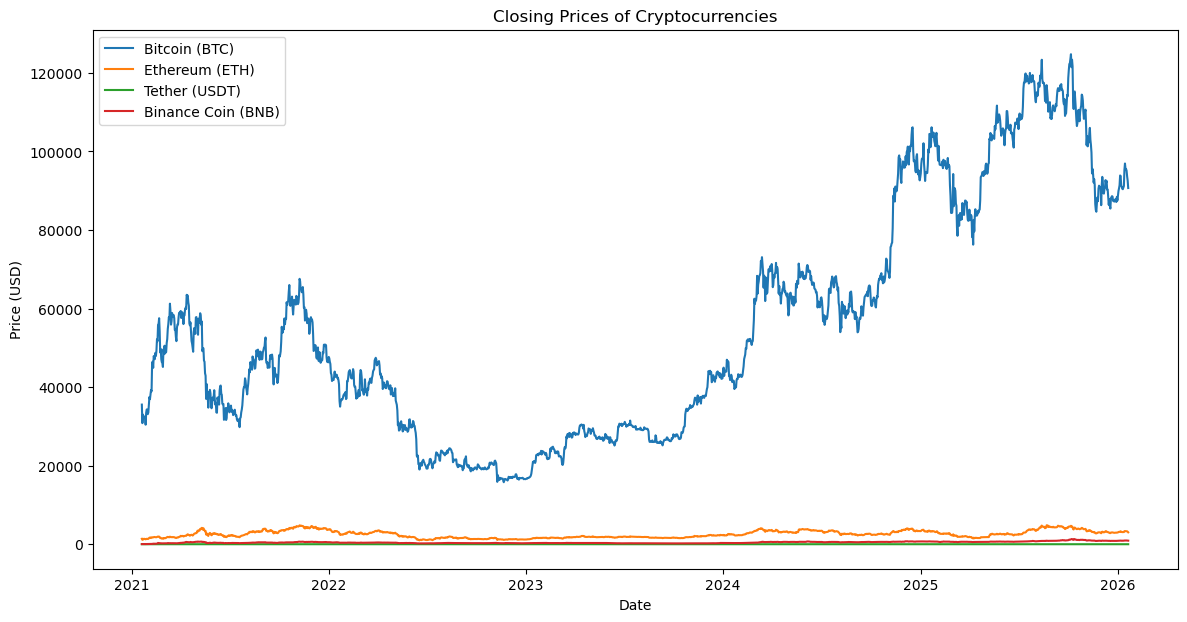

In [10]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


<Axes: xlabel='Date'>

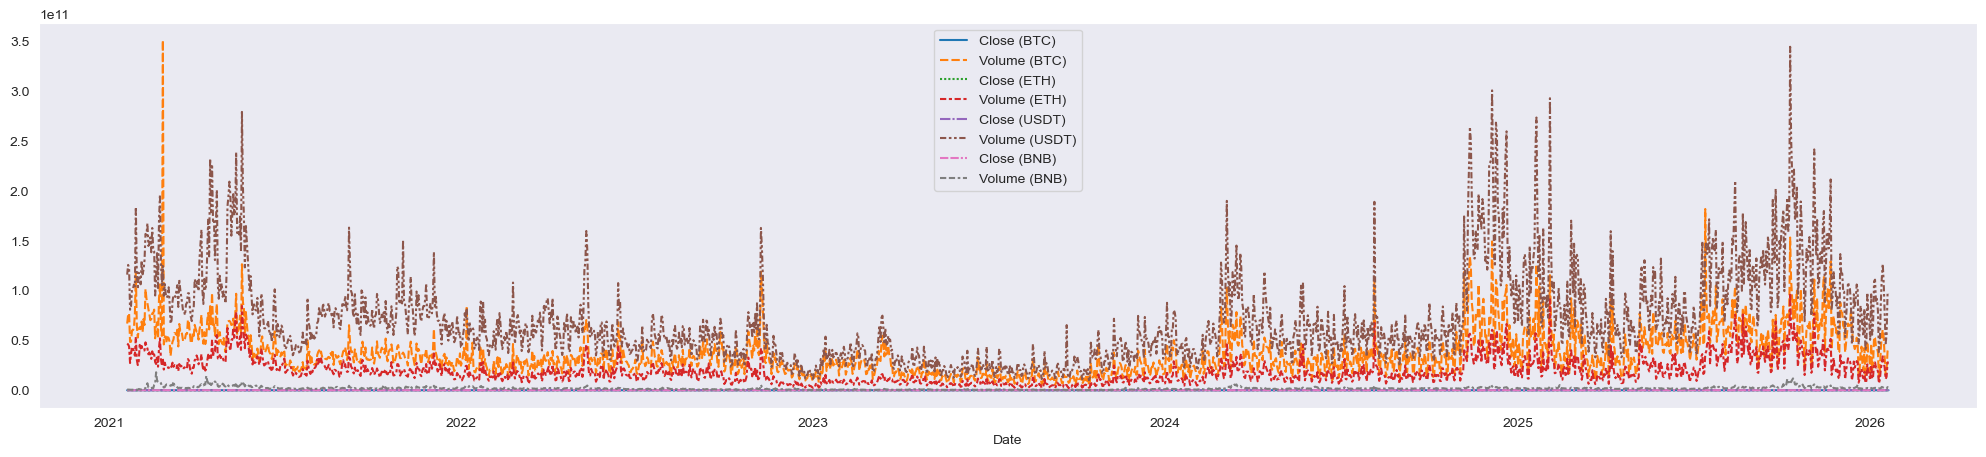

In [11]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

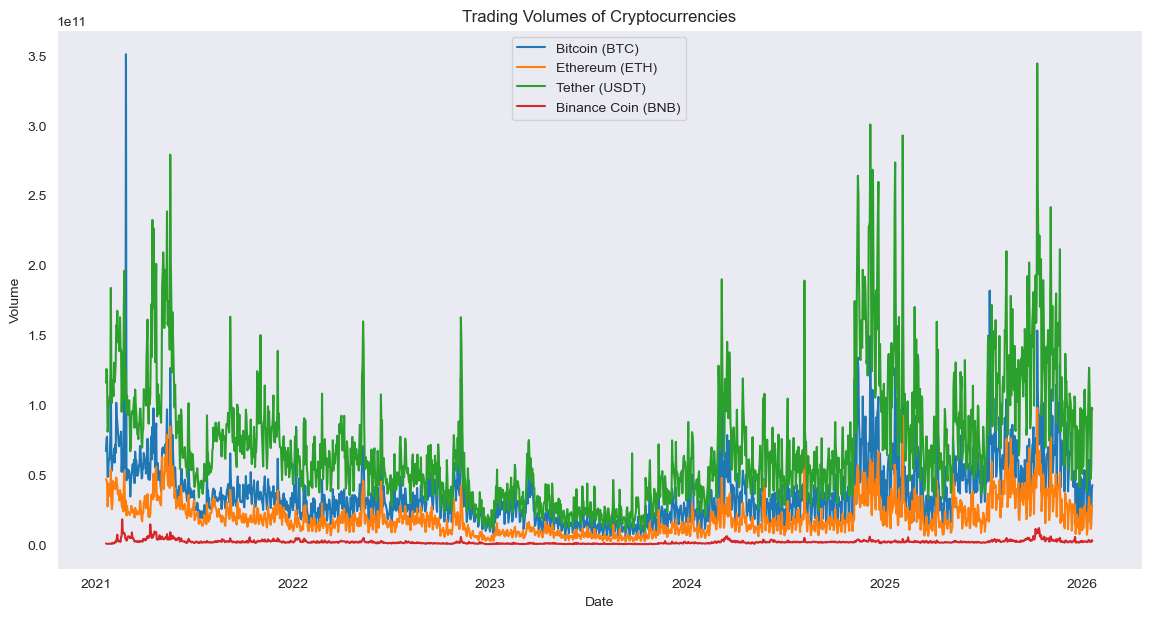

In [12]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


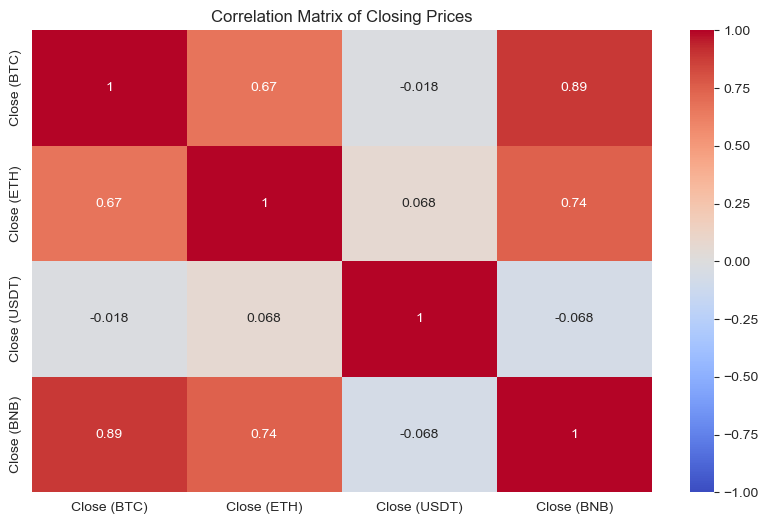

In [13]:
 #Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


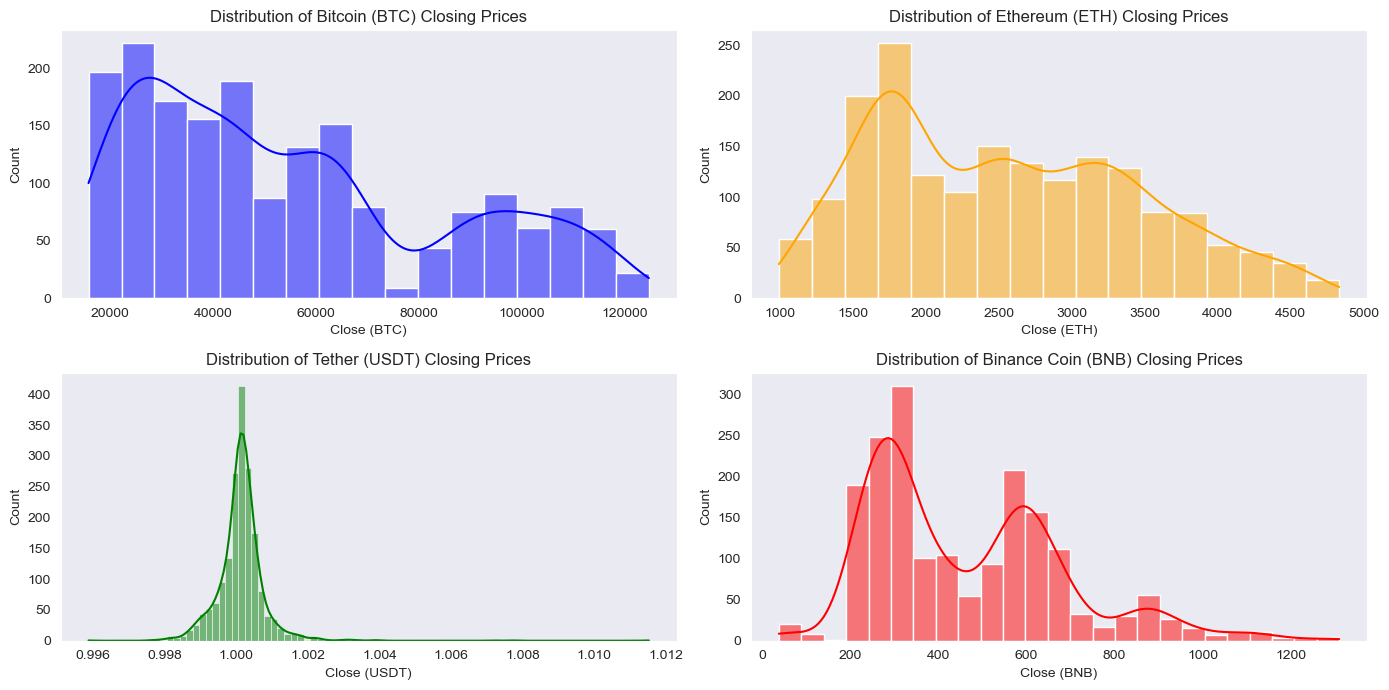

In [14]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

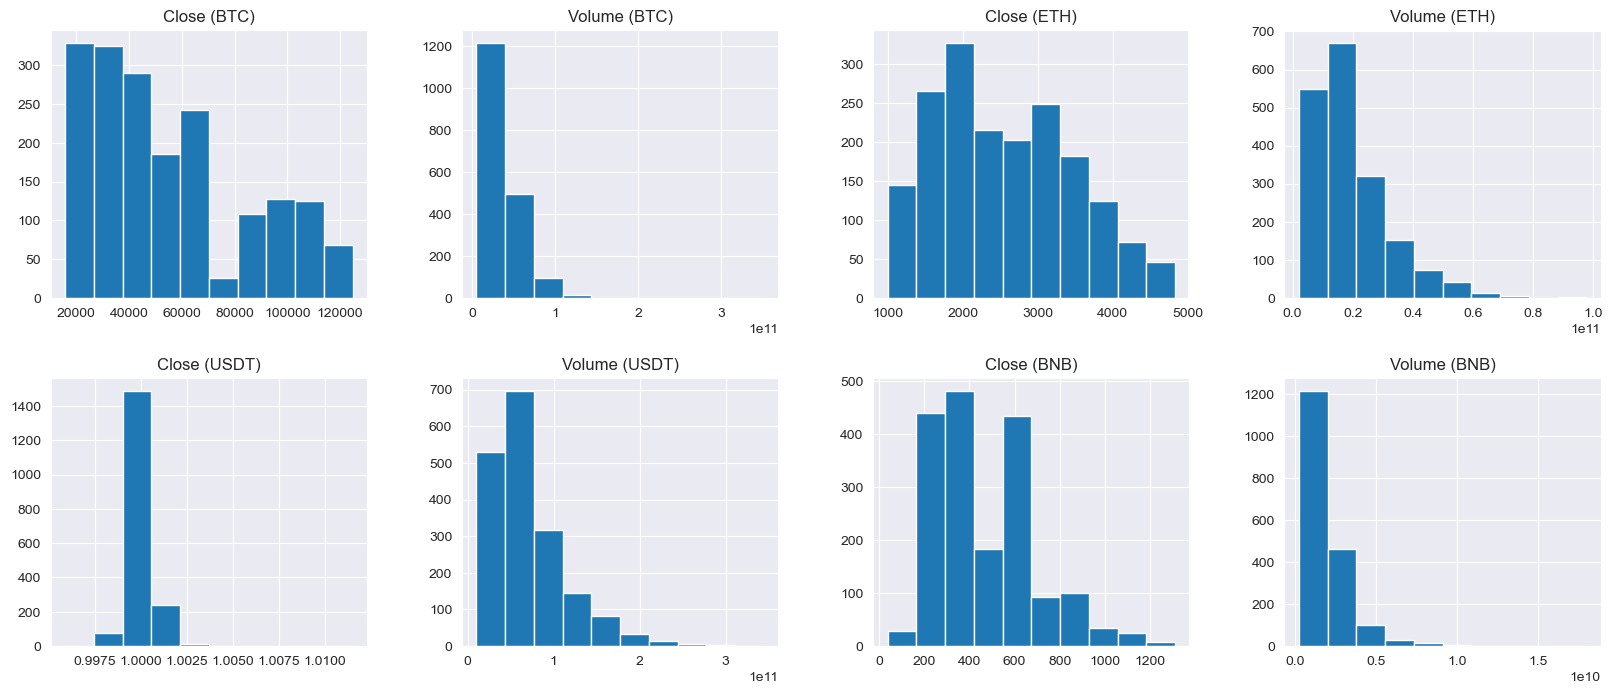

In [15]:
data.hist(figsize=(20, 8), layout=(2, 4))


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

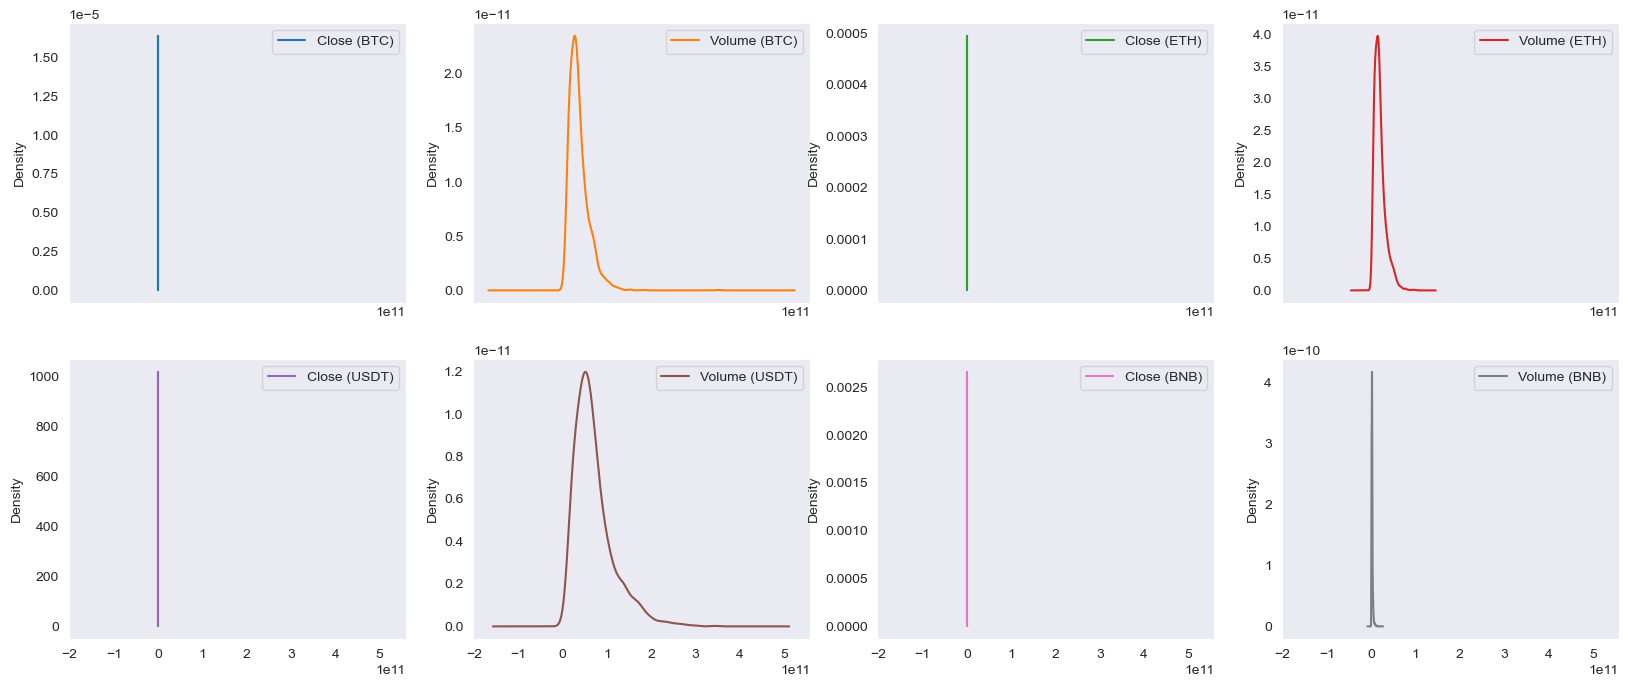

In [16]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

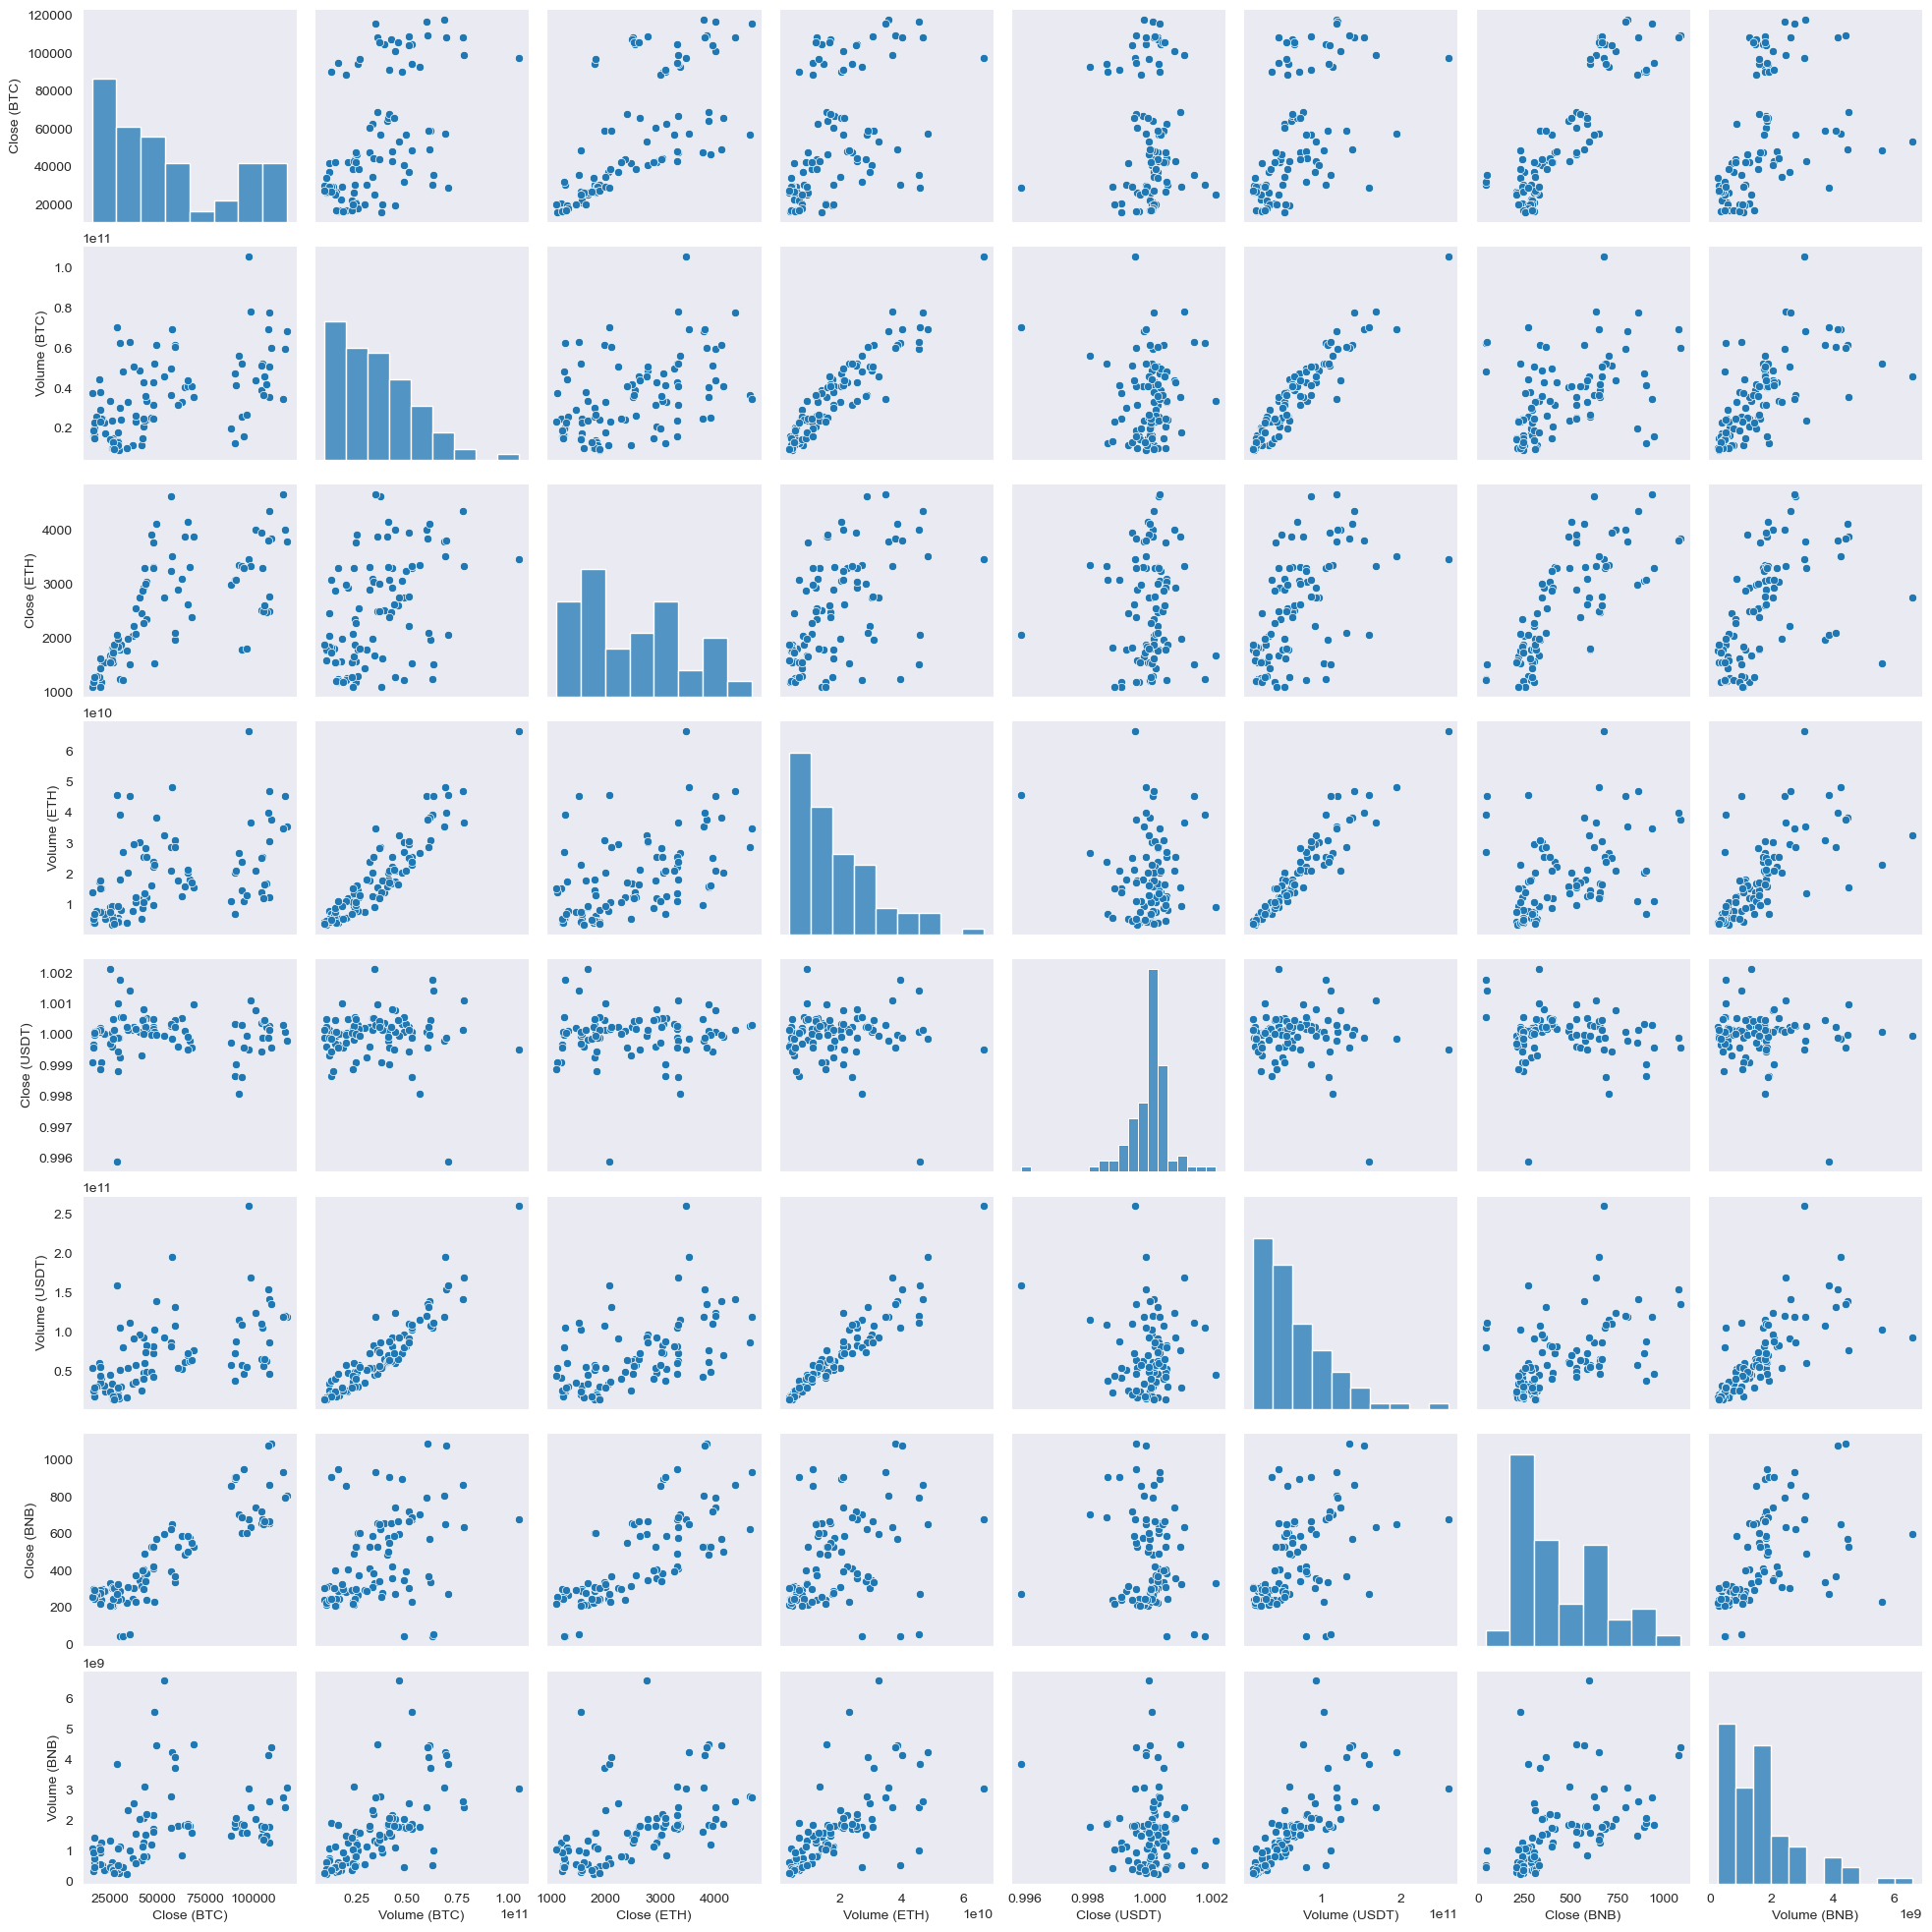

In [17]:
sns.pairplot(data.sample(n=100));

#Data Pre-processing

In [18]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [19]:
X.head()

Volume (BTC)  Close (ETH)  Volume (ETH)  \
Date                                                                 
2021-01-20 00:00:00+00:00   66834573161  1382.274048   46784030909   
2021-01-21 00:00:00+00:00   75643067688  1121.570923   45932464754   
2021-01-22 00:00:00+00:00   77207272511  1236.512207   43918338506   
2021-01-23 00:00:00+00:00   48354737975  1230.990601   27253895441   
2021-01-24 00:00:00+00:00   48643830599  1391.609375   36418163554   

                           Close (USDT)  Volume (USDT)  Close (BNB)  \
Date                                                                  
2021-01-20 00:00:00+00:00      1.000686   115893865966    42.606899   
2021-01-21 00:00:00+00:00      0.999696   125636003892    38.645840   
2021-01-22 00:00:00+00:00      1.001350   121548669235    40.857571   
2021-01-23 00:00:00+00:00      1.000555    80722167203    40.815479   
2021-01-24 00:00:00+00:00      1.001417    84413124756    41.881607   

                           Volume (BNB)  
Date                                     
2021-01-20 00:00:00+00:00     684094133  
2021-01-21 00:00:00+00:00     621983627  
2021-01-22 00:00:00+00:00     561072899  
2021-01-23 00:00:00+00:00     468609053  
2021-01-24 00:00:00+00:00     450486066

In [20]:
X.tail()

Volume (BTC)  Close (ETH)  Volume (ETH)  \
Date                                                                 
2026-01-16 00:00:00+00:00   33248170537  3295.482178   22732887284   
2026-01-17 00:00:00+00:00   16021715122  3308.864258   11206492253   
2026-01-18 00:00:00+00:00   20809781232  3281.157715   13557863288   
2026-01-19 00:00:00+00:00   39195241508  3186.621094   27956112545   
2026-01-20 00:00:00+00:00   42558111744  3030.984375   27609356288   

                           Close (USDT)  Volume (USDT)  Close (BNB)  \
Date                                                                  
2026-01-16 00:00:00+00:00      0.999513    75532025352   937.531860   
2026-01-17 00:00:00+00:00      0.999574    47015213256   947.044556   
2026-01-18 00:00:00+00:00      0.999623    55327428612   932.591370   
2026-01-19 00:00:00+00:00      0.999376    97910777183   922.495056   
2026-01-20 00:00:00+00:00      0.998989    96789536768   906.693970   

                           Volume (BNB)  
Date                                     
2026-01-16 00:00:00+00:00    1873697028  
2026-01-17 00:00:00+00:00    1840297630  
2026-01-18 00:00:00+00:00    1896106924  
2026-01-19 00:00:00+00:00    3099807569  
2026-01-20 00:00:00+00:00    2701019136

In [21]:
Y.head()


Date
2021-01-20 00:00:00+00:00    35547.750000
2021-01-21 00:00:00+00:00    30825.699219
2021-01-22 00:00:00+00:00    33005.761719
2021-01-23 00:00:00+00:00    32067.642578
2021-01-24 00:00:00+00:00    32289.378906
Name: Close (BTC), dtype: float64

In [22]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [23]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1461, 7)
X_test shape: (366, 7)
y_train shape: (1461,)
y_test shape: (366,)


In [24]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

c:\Users\abida\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [25]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features) 

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [26]:
X_train


array([[1.00028002e+00, 5.76009147e+10, 4.70625549e+02, 1.64643750e+09],
       [1.00038397e+00, 8.47307513e+10, 4.98078430e+02, 2.31024970e+09],
       [9.99979973e-01, 7.16816039e+10, 2.72401550e+02, 9.27431127e+08],
       ...,
       [9.99957025e-01, 1.15507998e+11, 7.83666809e+02, 2.58113723e+09],
       [1.00015903e+00, 5.47933153e+10, 2.83820984e+02, 1.76834411e+09],
       [1.00005400e+00, 2.87435876e+10, 2.88474274e+02, 7.05616866e+08]],
      shape=(1461, 4))

In [27]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 144927631.6284913
R-squared: 0.8328268468479669

----- Ridge Regression -----
Mean Squared Error (MSE): 145062934.61416218
R-squared: 0.8326707756661549

----- Lasso Regression -----
Mean Squared Error (MSE): 144958780.8797652
R-squared: 0.8327909163735966

----- ElasticNet Regression -----
Mean Squared Error (MSE): 764492695.1864808
R-squared: 0.1181622649873253

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 906039786.4856484
R-squared: -0.045111455186603644

----- Decision Tree Regression -----
Mean Squared Error (MSE): 85168991.62615377
R-squared: 0.9017580793880566

----- Random Forest Regression -----
Mean Squared Error (MSE): 41761115.77700494
R-squared: 0.9518288036232797

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 55690738.06051761
R-squared: 0.935761067932125

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 57426071.41196271
R-squared: 0.9337593713276113

c:\Users\abida\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


----- Neural Network Regression (MLP) -----
Mean Squared Error (MSE): 600648943.7590181
R-squared: 0.307155048783029

                             Model           MSE  R-squared
0                Linear Regression  1.449276e+08   0.832827
1                 Ridge Regression  1.450629e+08   0.832671
2                 Lasso Regression  1.449588e+08   0.832791
3            ElasticNet Regression  7.644927e+08   0.118162
4  Support Vector Regression (SVR)  9.060398e+08  -0.045111
5         Decision Tree Regression  8.516899e+07   0.901758
6         Random Forest Regression  4.176112e+07   0.951829
7     Gradient Boosting Regression  5.569074e+07   0.935761
8   K-Nearest Neighbors Regression  5.742607e+07   0.933759
9  Neural Network Regression (MLP)  6.006489e+08   0.307155


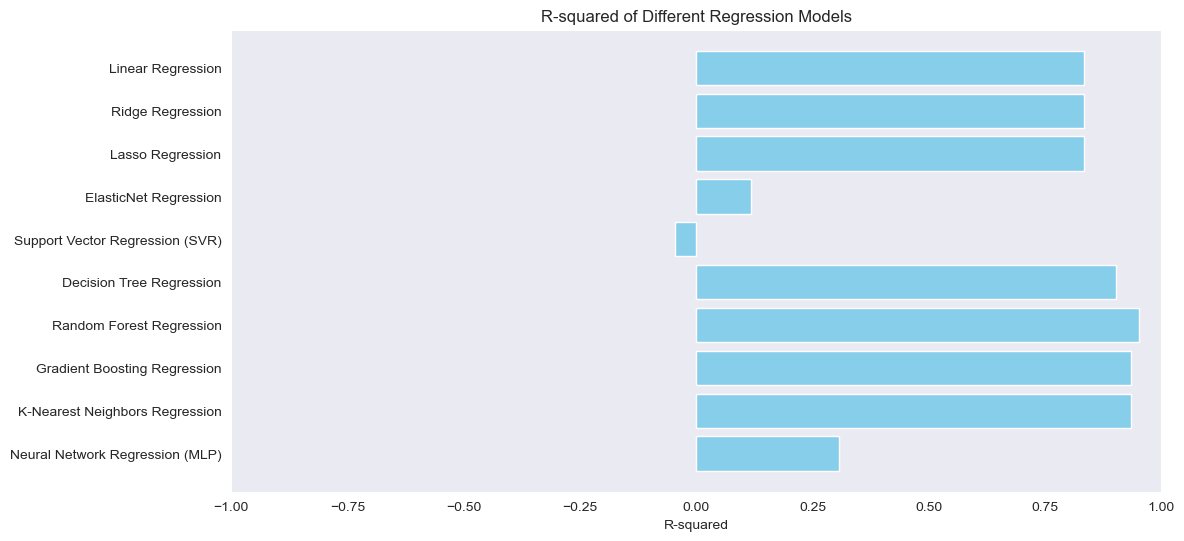

In [29]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


#Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

#Saving the Model


In [30]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 43605524.34149921
Loaded Random Forest Regression - R-squared: 0.9497012894152403
